In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [191]:
data = pd.read_csv("Individuals.csv")
data.head()

,year,category,film,name,result,gender,birthday
0,1930,Actor,In Old Arizona,Warner Baxter,Winner,Male,1889
1,1930,Actor,Thunderbolt,George Bancroft,Nominee,Male,1882
2,1930,Actor,Alibi,Chester Morris,Nominee,Male,1901
3,1930,Actor,The Valiant,Paul Muni,Nominee,Male,1895
4,1930,Actor,The Patriot,Lewis Stone,Nominee,Male,1879


In [192]:
hashmap = {}
for names in data["name"]:
    if hashmap.get(names) == None:
        hashmap[names] = 1
    else:
        hashmap[names] = hashmap[names] + 1

number_of_nomination = []

for names in data["name"]:
   number_of_nomination.append(hashmap.get(names))

data["Number of nominations"] = number_of_nomination

In [193]:
data["Age when nominated"] = data["year"] - data["birthday"]
for index_names in range(len(data["name"])):
    
    if data.loc[:,"result"][index_names] == "Nominee":
        data.loc[index_names:index_names, "Age when winner"] = np.nan
    if data.loc[:,"result"][index_names] == "Winner":
        data.loc[index_names:index_names, "Age when winner"] = data["year"][index_names] - data["birthday"][index_names]
data["Age when winner"] = data["Age when winner"].astype("Int64")

In [194]:
data.head()

,year,category,film,name,result,gender,birthday,Number of nominations,Age when nominated,Age when winner
0,1930,Actor,In Old Arizona,Warner Baxter,Winner,Male,1889,1,41,41
1,1930,Actor,Thunderbolt,George Bancroft,Nominee,Male,1882,1,48,<NA>
2,1930,Actor,Alibi,Chester Morris,Nominee,Male,1901,1,29,<NA>
3,1930,Actor,The Valiant,Paul Muni,Nominee,Male,1895,6,35,<NA>
4,1930,Actor,The Patriot,Lewis Stone,Nominee,Male,1879,1,51,<NA>


In [ ]:
ax = data.hist(column='Age when winner', by='gender', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Age when winner (year)", labelpad=20, weight='bold', size=12)
    plt.xlim(0, 90)


    # Set y-axis label
    if i == 1:
        x.set_ylabel("N", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

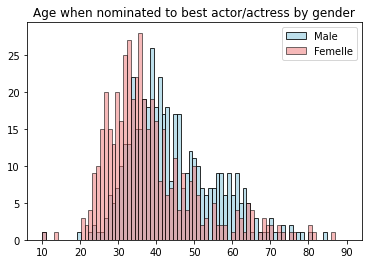

In [197]:
actor = data[data["gender"] == "Male"]
actor = actor[(actor["category"] == "Actor") | (actor["category"] == "Actor in a Leading Role")]
actor = actor[["Age when nominated"]]
actress = data[data["gender"] == "Female"]
actress = actress[(actress["category"] == "Actress") | (actress["category"] == "Actress in a Leading Role")]
actress = actress[["Age when nominated"]]

actor = actor.stack()
actress = actress.stack()


bins = np.linspace(10, 90, 80)

plt.hist(actor, bins=bins, color = "lightblue",alpha = 0.8, label= "Male", edgecolor = "black")

plt.hist(actress,  bins=bins, color="lightcoral", alpha=0.55, label = "Femelle", edgecolor = "black")
pyplot.legend(loc='upper right')

plt.title('Age when nominated to best actor/actress by gender')
plt.savefig("two_histograms_01.png", bbox_inches='tight',dpi=400)

plt.show()



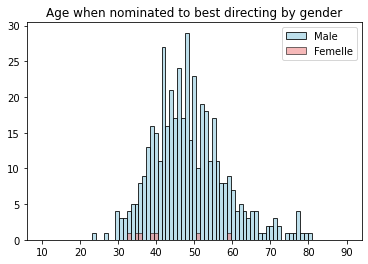

In [198]:
maledirecting = data[data["gender"] == "Male"]
maledirecting = maledirecting[maledirecting["category"] == "Directing"]
maledirecting = maledirecting[["Age when nominated"]]
femaledirecting = data[data["gender"] == "Female"]
femaledirecting = femaledirecting[femaledirecting["category"] == "Directing"]
femaledirecting = femaledirecting[["Age when nominated"]]

maledirecting = maledirecting.stack()
femaledirecting = femaledirecting.stack()

bins = np.linspace(10, 90, 80)

plt.hist(maledirecting, bins=bins, color = "lightblue",alpha = 0.8, label= "Male", edgecolor = "black")

plt.hist(femaledirecting,  bins=bins, color="lightcoral", alpha=0.55, label = "Femelle", edgecolor = "black")
pyplot.legend(loc='upper right')

plt.title('Age when nominated to best directing by gender')
plt.savefig("two_histograms_03.png", bbox_inches='tight',dpi=400)

plt.show()

In [221]:
list_category = []
blabla = ""
while blabla != "Stop":
    blabla = input("Write one category you want to search then press enter. When you're done, write 'Stop'")
    if blabla != "Stop":
        list_category.append(blabla)
        

In [224]:
"belle gosse" in list_category

True

In [6]:
from ast import literal_eval
import pandas as pd
dataf = pd.read_csv("Complete Data\Films.csv",converters={"genreids": literal_eval})
dataf.head()

,year,category,film,name,result,gender,birthday,genreids,original_language
0,1930,Outstanding Picture,The Broadway Melody,Metro-Goldwyn-Mayer,Winner,NaN,NaN,"[18, 10402, 10749]",en
1,1930,Outstanding Picture,Alibi,Feature Productions,Nominee,NaN,NaN,"[28, 80, 53]",en
2,1930,Outstanding Picture,In Old Arizona,Fox,Nominee,NaN,NaN,"[28, 37]",en
3,1930,Outstanding Picture,The Hollywood Revue of 1929,Metro-Goldwyn-Mayer,Nominee,NaN,NaN,"[35, 10402]",en
4,1930,Outstanding Picture,The Patriot,Paramount Famous Lasky,Nominee,NaN,NaN,[18],en


In [23]:
#changing list of ids to 1d list
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

countedValues = to_1D(dataf['genreids']).value_counts()

#decoding categories by their ID
def decodeCategories(series):
    dictionary = {28:"Action", 
               12:"Adventure", 
               16:"Animation",
               27:"Horror",
               35:"Comedy", 
               80:"Crime", 
               99:"Documentary", 
               18:"Drama", 
               10751:"Family", 
               14:"Fantasy", 
               36:"History", 
               7:"Horror", 
               10402:"Music", 
               9648:"Mystery", 
               10749:"Romance", 
               878:"Science Fiction", 
               10770:"TV Movie", 
               53:"Thriller", 
               10752:"War", 
               37:"Western"}
    
    return(series.rename(index=dictionary))
        

decodedCategories=decodeCategories(countedValues)
    

Text(0.5, 1.0, 'Most nominated genres')

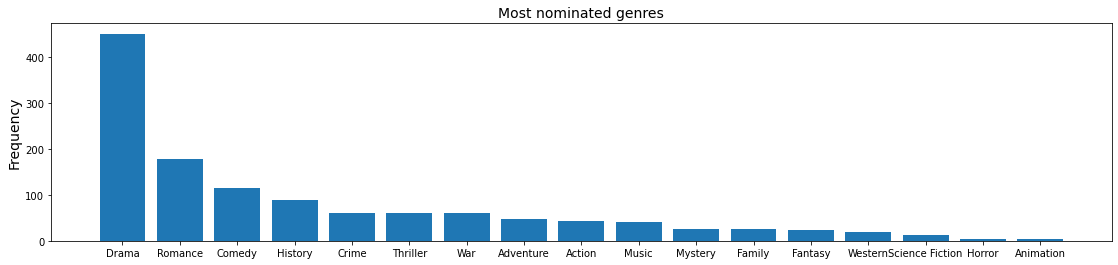

In [24]:
#creating Figure
fig, ax = plt.subplots(figsize = (19,4))
ax.bar(decodedCategories.index,
        decodedCategories.values)
ax.set_ylabel("Number of nominations", size = 14)
ax.set_title("Most nominated genres", size = 14)

In [27]:
#winners only dataframe
winnersonly = dataf.loc[dataf['result']=='Winner']
winnersonly.head()

,year,category,film,name,result,gender,birthday,genreids,original_language
0,1930,Outstanding Picture,The Broadway Melody,Metro-Goldwyn-Mayer,Winner,NaN,NaN,"[18, 10402, 10749]",en
5,1931,Outstanding Production,All Quiet on the Western Front,Universal,Winner,NaN,NaN,"[18, 10752]",en
10,1932,Outstanding Production,Cimarron,RKO Radio,Winner,NaN,NaN,"[18, 37, 36]",en
15,1933,Outstanding Production,Grand Hotel,Metro-Goldwyn-Mayer,Winner,NaN,NaN,"[18, 10749]",en
23,1934,Outstanding Production,Cavalcade,Fox,Winner,NaN,NaN,"[18, 10752]",en


Text(0.5, 1.0, 'Most winning genres as Best Picture')

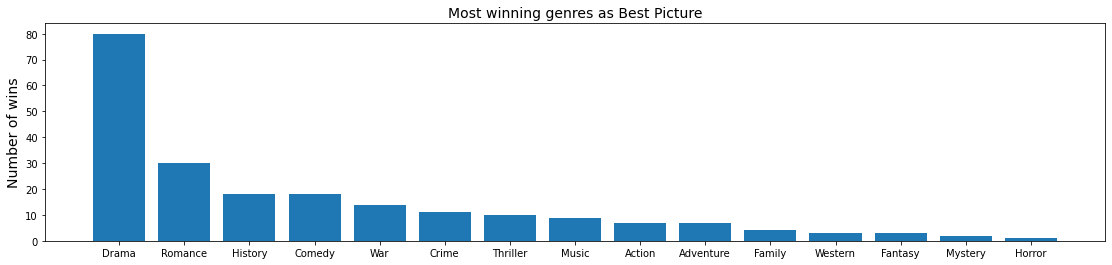

In [46]:
countedWinners = to_1D(winnersonly['genreids']).value_counts()
decodedWinners = decodeCategories(countedWinners)
fig, ax = plt.subplots(figsize = (19,4))
ax.bar(decodedWinners.index,
        decodedWinners.values)
ax.set_ylabel("Number of wins", size = 14)
ax.set_title("Most winning genres as Best Picture", size = 14)

Text(0.5, 1.0, 'Most nominated films by language for Best Picture')

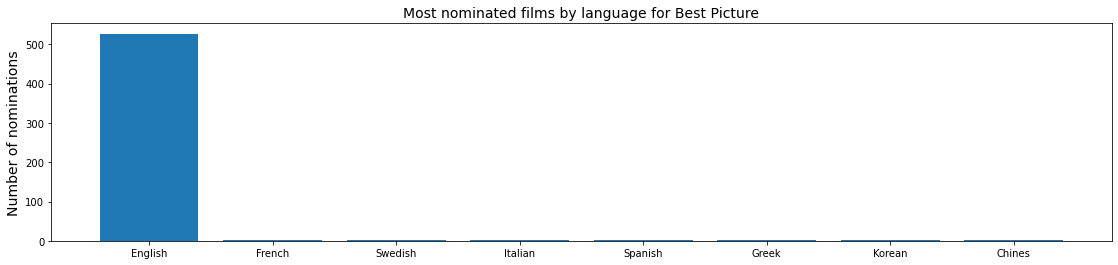

In [34]:

def decodeLanguage(series):
    #language Decoder
    dictionary = {'en':'English',
                 'fr': 'French',
                 'it': 'Italian',
                 'sv': 'Swedish',
                 'es': 'Spanish',
                 'el': 'Greek',
                 'ko': 'Korean',
                 'zh': 'Chines',}
    
    
    return(series.rename(index=dictionary))
    

fig, ax = plt.subplots(figsize = (19,4))
decodedLanguage = decodeLanguage(dataf['original_language'].value_counts())
ax.bar(decodedLanguage.index,
        decodedLanguage.values)
ax.set_ylabel("Number of nominations", size = 14)
ax.set_title("Most nominated films by language for Best Picture", size = 14)

Text(0.5, 1.0, 'Most winning languages for Best Picture')

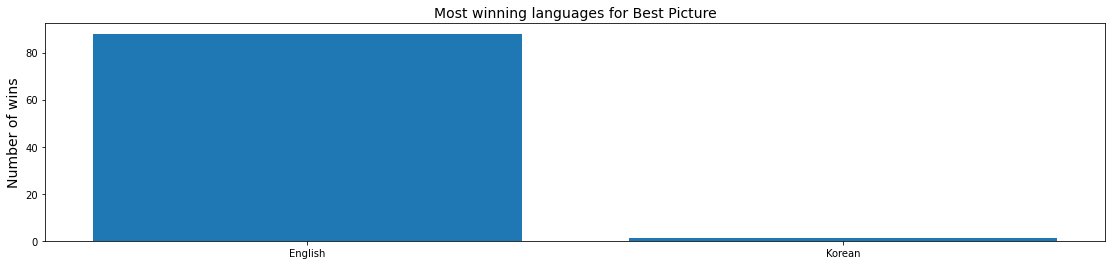

In [45]:
decodedWinnersLanguage = decodeLanguage(winnersonly['original_language'].value_counts())

fig, ax = plt.subplots(figsize = (19,4))
ax.bar(decodedWinnersLanguage.index,
        decodedWinnersLanguage.values)
ax.set_ylabel("Number of wins", size = 14)
ax.set_title("Most winning languages for Best Picture", size = 14)

In [44]:
koreanWinner = winnersonly.loc[winnersonly['original_language']== 'ko']
koreanWinner

,year,category,film,name,result,gender,birthday,genreids,original_language
521,2020,Best Picture,Parasite,"Kwak Sin Ae and Bong Joon Ho, Producers",Winner,NaN,NaN,"[35, 53, 18]",ko


In [50]:
nomineeswithoutEnglish = dataf.loc[dataf['original_language']!= 'en']
nomineeswithoutEnglish

,year,category,film,name,result,gender,birthday,genreids,original_language
83,1939,Outstanding Production,Grand Illusion,Realization D'Art Cinematographique,Nominee,NaN,NaN,"[18, 36, 10752]",fr
211,1965,Best Picture,Zorba the Greek,"Michael Cacoyannis, Producer",Nominee,NaN,NaN,[18],el
236,1970,Best Picture,Z,"Jacques Perrin and Hamed Rachedi, Producers",Nominee,NaN,NaN,"[18, 36, 53]",fr
250,1973,Best Picture,The Emigrants,"Bengt Forslund, Producer",Nominee,NaN,NaN,"[18, 36]",sv
254,1974,Best Picture,Cries and Whispers,"Ingmar Bergman, Producer",Nominee,NaN,NaN,[18],sv
365,1996,Best Picture,The Postman,"Mario Cecchi Gori, Vittorio Cecchi Gori and Ga...",Nominee,NaN,NaN,"[35, 18, 10749]",it
379,1999,Best Picture,Life Is Beautiful,"Elda Ferri and Gianluigi Braschi, Producers",Nominee,NaN,NaN,"[35, 18]",it
389,2001,Best Picture,"Crouching Tiger, Hidden Dragon","Bill Kong, Hsu Li Kong and Ang Lee, Producers",Nominee,NaN,NaN,"[12, 18, 28, 10749]",zh
462,2013,Best Picture,Amour,"Margaret Menegoz, Stefan Arndt, Veit Heiduschk...",Nominee,NaN,NaN,"[18, 10749]",fr
518,2019,Best Picture,Roma,"Gabriela Rodríguez and Alfonso Cuarón, Producers",Nominee,NaN,NaN,[18],es


Text(0.5, 1.0, 'Most nominations for Best Picture for non-english films')

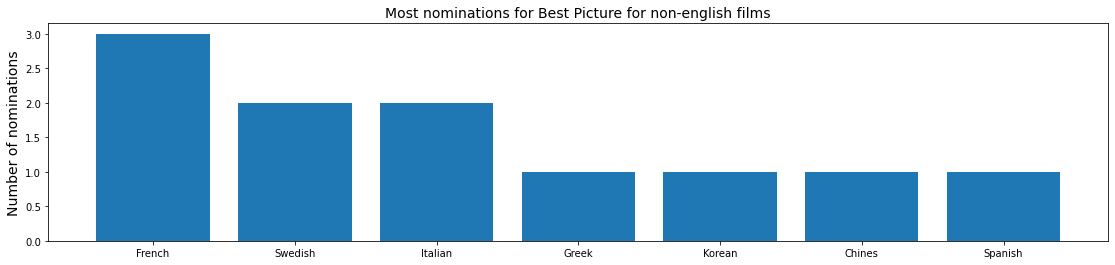

In [52]:
decodednomineesFLanguage = decodeLanguage(nomineeswithoutEnglish['original_language'].value_counts())

fig, ax = plt.subplots(figsize = (19,4))
ax.bar(decodednomineesFLanguage.index,
        decodednomineesFLanguage.values)
ax.set_ylabel("Number of nominations", size = 14)
ax.set_title("Most nominations for Best Picture for non-english films", size = 14)